# Riskfolio-Lib Tutorial: 
<br><a href="https://www.kqzyfj.com/click-101359873-15150084?url=https%3A%2F%2Flink.springer.com%2Fbook%2F9783031843037" target="_blank">
        <button style="padding:10px 20px; font-size:16px; background-color: #FFA500; color:white; border:none; border-radius:5px; cursor:pointer;">
            Buy Advanced Portfolio Optimization Book on Springer
        </button>
    </a>
<br>
<br><a href='https://ko-fi.com/B0B833SXD' target='_blank'><img height='36' style='border:0px;height:36px;' src='https://cdn.ko-fi.com/cdn/kofi1.png?v=2' border='0' alt='Buy Me a Coffee at ko-fi.com' /></a> 
<br>
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.linkedin.com/company/orenj-i)__
<br>__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__

## Tutorial 25: Hierarchical Equal Risk Contribution (HERC) Portfolio Optimization

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = [ 'AXP', 'DIS', 'GS', 'MMM', 'UNH','MCD','CAT','CRM','V','AMGN','TRV','MSFT']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[**********************83%***************        ]  10 of 12 completed

12 Failed downloads:
['V', 'AMGN', 'MSFT', 'UNH', 'GS', 'AXP', 'MCD', 'DIS', 'CAT', 'MMM', 'TRV', 'CRM']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')


In [24]:
df_dow = read_csv('./data/dow.csv')
df_dow.dtypes

Unnamed: 0      int64
date           object
open          float64
high          float64
low           float64
close         float64
volume          int64
tic            object
day             int64
dtype: object

In [4]:
from pandas import read_csv


df_dow = read_csv('./data/dow.csv')
df = df_dow.copy()
assets = [ 'AXP', 'DIS', 'GS', 'MMM', 'UNH','MCD','CAT','CRM','V','AMGN','TRV','MSFT']
df = df_dow[df_dow.tic.isin(assets)]
df

,Unnamed: 0,date,open,high,low,close,volume,tic,day
1,1,2000-01-03,70.000000,70.000000,62.875000,44.260464,22914900,AMGN,0
2,2,2000-01-03,47.995617,47.995617,45.515598,32.595165,6471267,AXP,0
4,4,2000-01-03,23.843750,24.500000,23.843750,12.717304,5055000,CAT,0
7,7,2000-01-03,28.855125,29.533344,28.361876,22.833183,8402230,DIS,0
8,8,2000-01-03,94.187500,94.375000,87.750000,62.611706,1822600,GS,0
...,...,...,...,...,...,...,...,...,...
180612,180612,2024-12-30,129.119995,129.919998,127.919998,129.130005,2154000,MMM,0
180614,180614,2024-12-30,426.059998,427.549988,421.899994,424.829987,13158700,MSFT,0
180617,180617,2024-12-30,239.880005,241.169998,237.610001,239.869995,734300,TRV,0
180618,180618,2024-12-30,506.859985,509.730011,500.660004,507.799988,5408600,UNH,0


In [5]:
zzz = df.pivot_table(values='close',columns='tic',index='date')
zzz

tic,AMGN,AXP,CAT,CRM,DIS,GS,MCD,MMM,MSFT,TRV,UNH,V
date,,,,,,,,,,,,
2000-01-03,44.260464,32.595165,12.717304,NaN,22.833183,62.611706,21.532162,19.709019,35.864079,17.670914,5.338302,NaN
2000-01-04,40.876080,31.364429,12.553844,NaN,24.170689,58.668015,21.090652,18.925877,34.652592,17.436638,5.270021,NaN
2000-01-05,42.282600,30.567789,12.848078,NaN,25.173813,55.920731,21.430277,19.474075,35.017952,17.302773,5.257607,NaN
2000-01-06,42.985836,31.190567,13.501927,NaN,24.170689,58.313488,21.124611,21.040348,33.844925,17.637440,5.450033,NaN
2000-01-07,47.820648,31.644684,13.943269,NaN,23.788542,58.535057,21.668013,21.458029,34.287216,18.340273,6.089388,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,264.000000,298.099121,364.055389,342.899994,111.400002,570.780029,291.290009,128.979996,435.250000,241.360001,506.339996,317.220001
2024-12-24,264.489990,302.748199,366.227417,344.429993,112.559998,582.789978,293.989990,130.360001,439.329987,242.880005,506.100006,320.649994
2024-12-26,263.179993,303.276947,365.779053,341.720001,112.550003,581.229980,294.799988,131.179993,438.109985,243.729996,511.149994,320.910004


In [7]:
zzz.head().style.format("{:.2f}")


tic,AMGN,AXP,CAT,CRM,DIS,GS,MCD,MMM,MSFT,TRV,UNH,V
date,,,,,,,,,,,,
2000-01-03,44.26,32.60,12.72,nan,22.83,62.61,21.53,19.71,35.86,17.67,5.34,nan
2000-01-04,40.88,31.36,12.55,nan,24.17,58.67,21.09,18.93,34.65,17.44,5.27,nan
2000-01-05,42.28,30.57,12.85,nan,25.17,55.92,21.43,19.47,35.02,17.30,5.26,nan
2000-01-06,42.99,31.19,13.50,nan,24.17,58.31,21.12,21.04,33.84,17.64,5.45,nan
2000-01-07,47.82,31.64,13.94,nan,23.79,58.54,21.67,21.46,34.29,18.34,6.09,nan


In [9]:
# Calculating returns

Y = zzz.pct_change().dropna()

Y

tic,AMGN,AXP,CAT,CRM,DIS,GS,MCD,MMM,MSFT,TRV,UNH,V
date,,,,,,,,,,,,
2008-03-20,0.003503,0.094763,0.001221,-0.013778,0.021127,0.078923,0.014163,-0.018749,0.019567,0.029735,-0.006469,0.138938
2008-03-24,0.021690,0.031100,0.029938,0.068243,0.004389,-0.004175,0.024807,0.008464,-0.000343,-0.002093,0.011042,-0.071795
2008-03-25,-0.003416,0.002109,0.008023,0.022133,0.001249,0.004193,0.007710,0.004324,-0.001028,0.001468,-0.012041,0.058931
2008-03-26,0.028403,-0.045254,0.009395,-0.028215,-0.009975,-0.023103,-0.010677,-0.004052,-0.019904,-0.004398,-0.033447,0.011226
2008-03-27,-0.012143,-0.011684,-0.004266,-0.044058,-0.011965,-0.041828,-0.002698,-0.010170,-0.017857,-0.001892,-0.002933,-0.016417
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,0.002354,0.000502,-0.001776,-0.002182,-0.005623,0.008267,-0.004749,-0.002321,-0.003092,0.002492,0.012417,-0.001542
2024-12-24,0.001856,0.015596,0.005966,0.004462,0.010413,0.021041,0.009269,0.010699,0.009374,0.006298,-0.000474,0.010813
2024-12-26,-0.004953,0.001746,-0.001224,-0.007868,-0.000089,-0.002677,0.002755,0.006290,-0.002777,0.003500,0.009978,0.000811


In [12]:
!pip install riskfolio-lib

   ---------------------------------------- 0.0/927.1 kB ? eta -:--:--
   ---------------------------------------- 927.1/927.1 kB 8.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.5 MB ? eta -:--:--
   ---------------- ----------------------- 2.6/6.5 MB 13.7 MB/s eta 0:00:01
   ------------------------------ --------- 5.0/6.5 MB 12.6 MB/s eta 0:00:01
   ---------------------------------------- 6.5/6.5 MB 10.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.9 MB 4.8 MB/s eta 0:00:02
   ----- ---------------------------------- 1.3/9.9 MB 3.7 MB/s eta 0:00:03
   ------ --------------------------------- 1.6/9.9 MB 3.1 MB/s eta 0:00:03
   ------- -------------------------------- 1.8/9.9 MB 2.5 MB/s eta 0:00:04
   -------- ------------------------------- 2.1/9.9 MB 2.0 MB/s eta 0:00:04
   --------- ------------------------------ 2.4/9.9 MB 1.9 MB/s eta 0:00:04
   --------- -----------


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\versu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


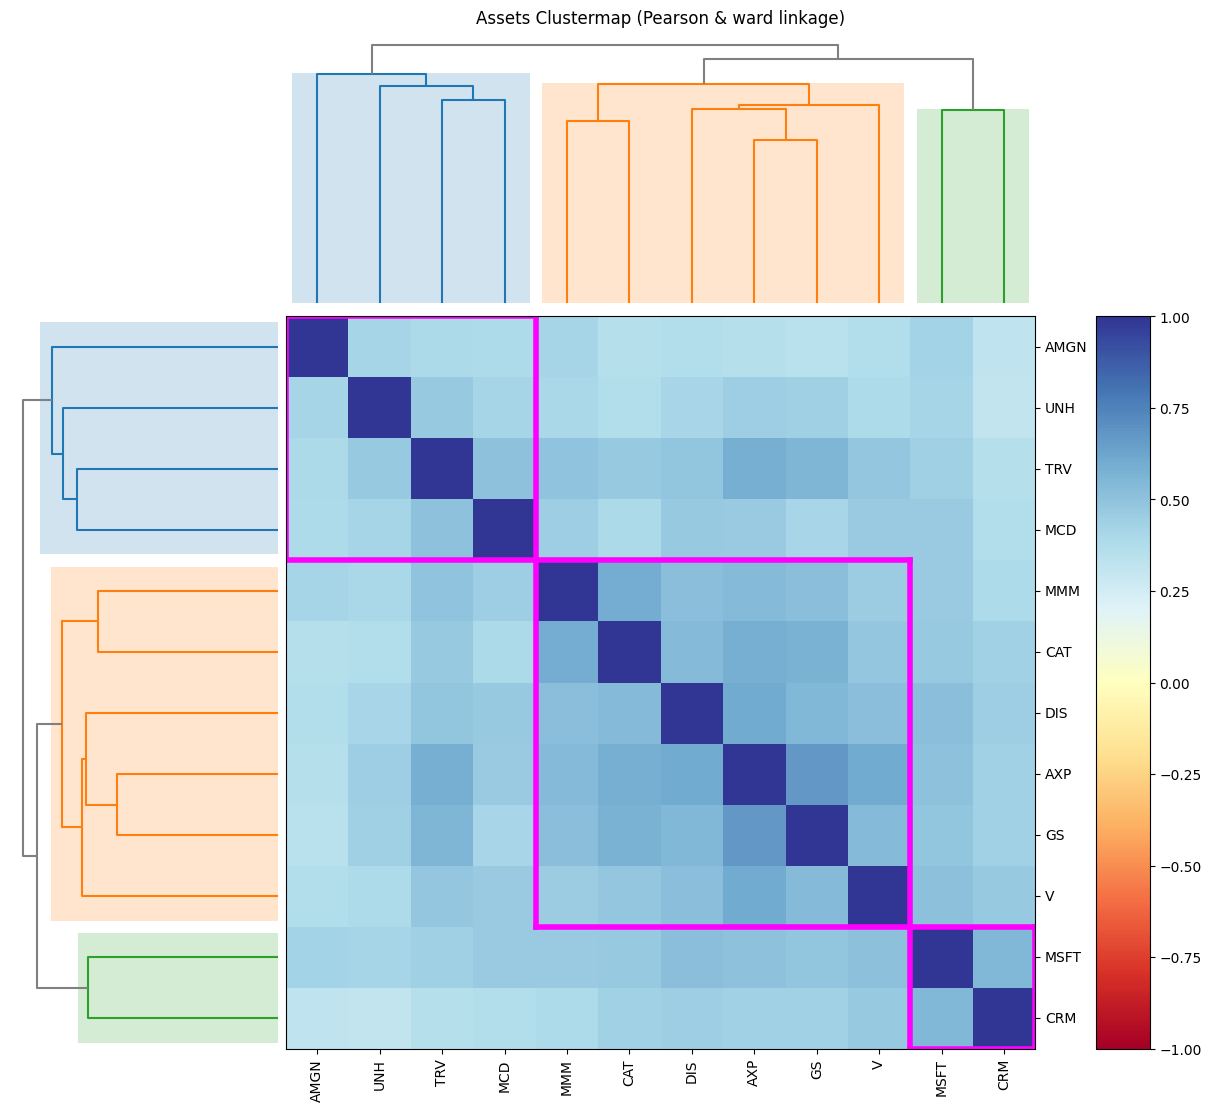

In [13]:
import riskfolio as rp

# Plotting Assets Clusters

ax = rp.plot_clusters(returns=Y,
                      codependence='pearson',
                      linkage='ward',
                      k=None,
                      max_k=10,
                      leaf_order=True,
                      dendrogram=True,
                      #linecolor='tab:purple',
                      ax=None)

The graph above suggest that optimal number of clusters are four.

## 2. Estimating HERC Portfolio

This is the original model proposed by Raffinot (2018). Riskfolio-Lib expand this model to 32 risk measures.

### 2.1 Calculating the HERC portfolio

In [26]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'MinRisk' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,AMGN,AXP,CAT,CRM,DIS,GS,MCD,MMM,MSFT,TRV,UNH,V
weights,0.183025,1.230378e-09,7.476708e-09,3.180685e-09,0.010465,2.353416e-09,0.513651,0.178187,0.038826,0.021106,0.015921,0.03882


### 2.2 Plotting portfolio composition

In [27]:
b = None # Risk contribution constraints vector

w_rp = port.rp_optimization(model=model, rm=rm, rf=rf, b=b, hist=hist)

display(w.T)

,AMGN,AXP,CAT,CRM,DIS,GS,MCD,MMM,MSFT,TRV,UNH,V
weights,0.183025,1.230378e-09,7.476708e-09,3.180685e-09,0.010465,2.353416e-09,0.513651,0.178187,0.038826,0.021106,0.015921,0.03882


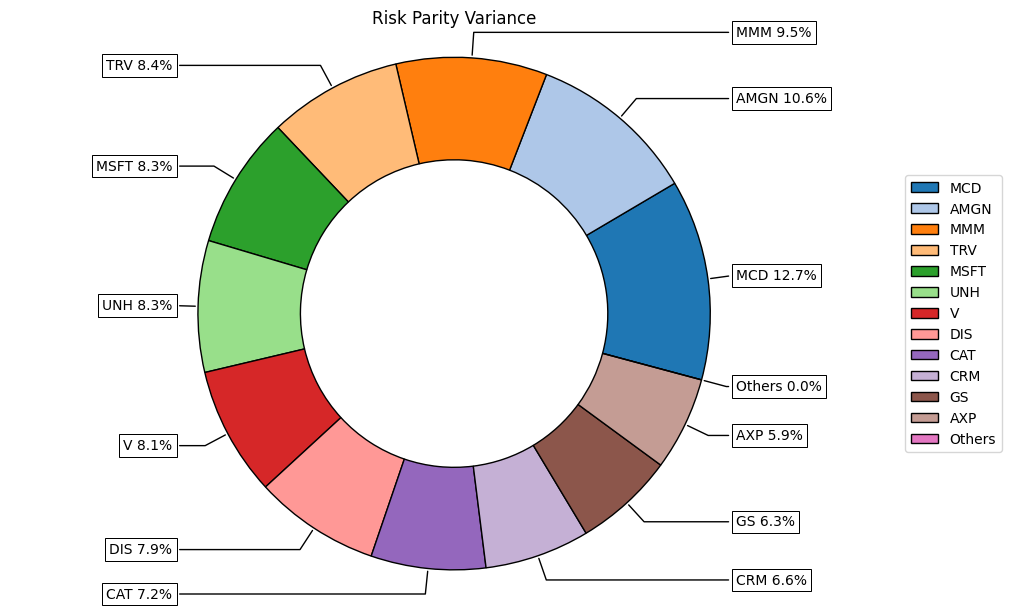

In [28]:
ax = rp.plot_pie(w=w_rp, title='Risk Parity Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 2.3 Plotting Risk Contribution

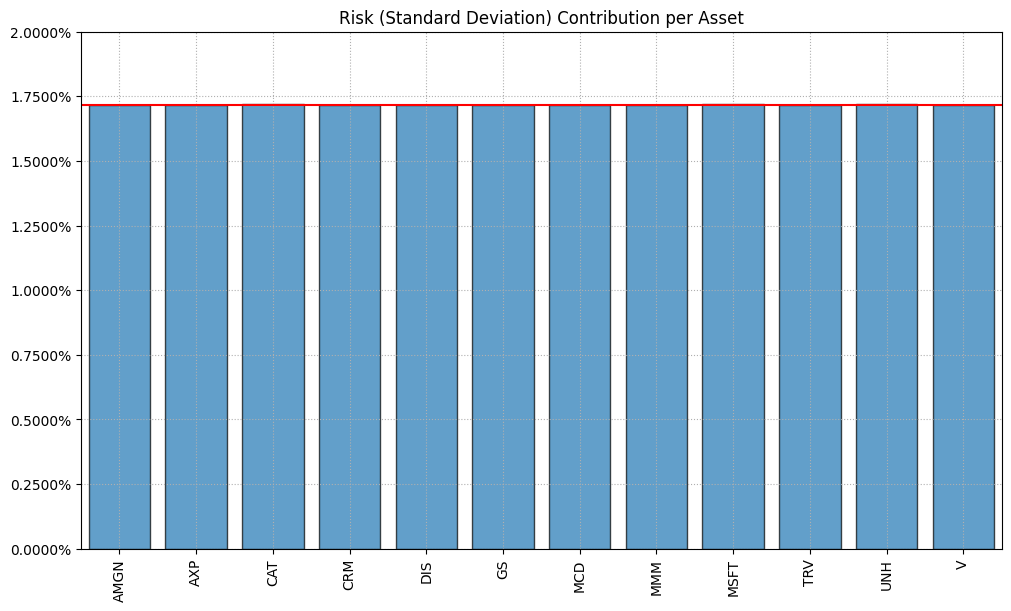

In [29]:
ax = rp.plot_risk_con(w_rp, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=None)

### 2.4 Calculate Optimal HERC Portfolios for Several Risk Measures

<Axes: >

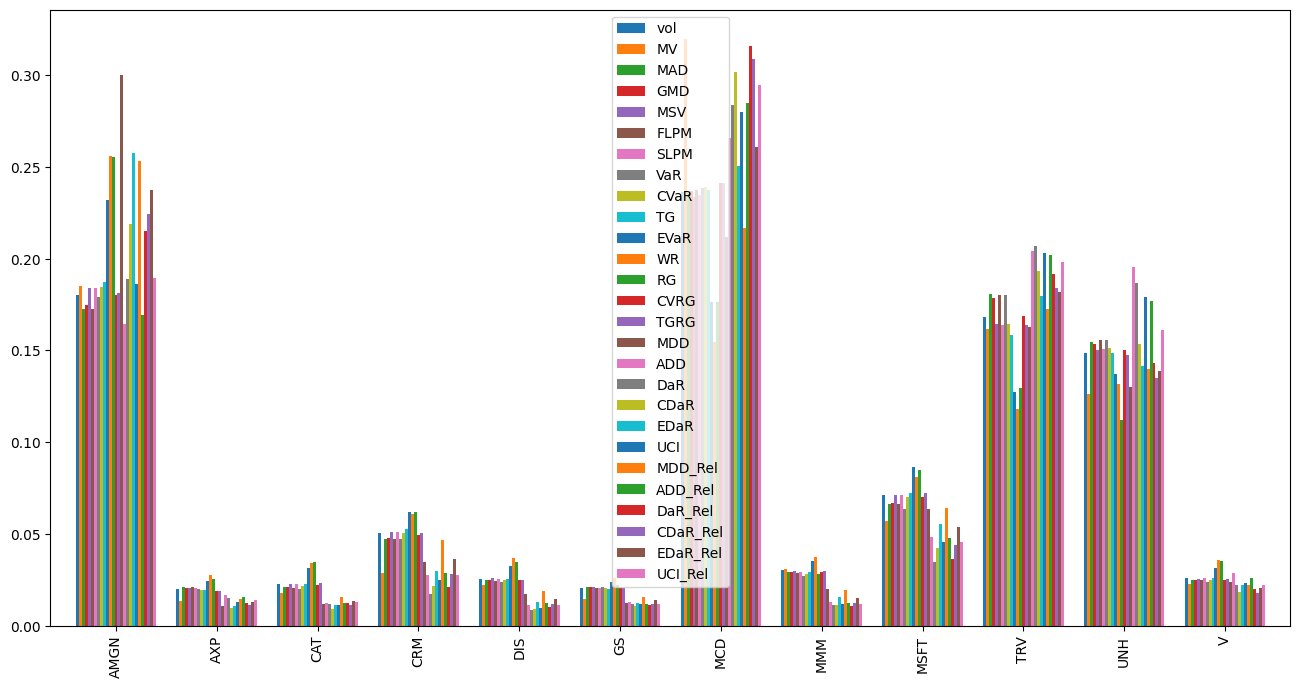

In [18]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(16)
fig.set_figheight(8)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot(kind='bar', width=0.8, ax=ax)